Kelompok 1A

# **Team Data Wizard**
1. Muhamad Ali Yafi
2. Hafiizh Taufiqul Hakim
3. Sutin Bobihu
4. Muhammad Sodikur Rifki
5. Larasati Syarafina Qamarani
6. Ligia Juita Sari
7. Anggun Nur Musyarofah
8. Silvia Risma Febiola Marbun

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
data = pd.read_csv(r"/content/Training Data.csv")

In [ ]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
total = len(data)

In [ ]:
total

252000

### Tugas No 1 Descriptive Statistics

In [ ]:
 # Cek tipe data dan missing value
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66258 entries, 0 to 66257
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 66258 non-null  int64  
 1   Income             66258 non-null  int64  
 2   Age                66258 non-null  int64  
 3   Experience         66258 non-null  int64  
 4   Married/Single     66258 non-null  object 
 5   House_Ownership    66258 non-null  object 
 6   Car_Ownership      66258 non-null  object 
 7   Profession         66258 non-null  object 
 8   CITY               66257 non-null  object 
 9   STATE              66257 non-null  object 
 10  CURRENT_JOB_YRS    66257 non-null  float64
 11  CURRENT_HOUSE_YRS  66257 non-null  float64
 12  Risk_Flag          66257 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 6.6+ MB


Dari syntax `data.info()`, terlihat bahwa kolom Id memiliki tipe data int64 atau integer. Hal ini tidak sesuai karena karakter pada Id bukanlah kumpulan angka yang bisa dilakukan operasi matematika. Sehingga diperlukan penyesuaian dengan mengubah tipe data pada kolom Id dari Int64 menjadi object.

In [ ]:
# Ubah tipe data kolom Id
data['Id'] = data['Id'].astype(str)

# Cek apakah tipe data sudah sesuai dan cek missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66258 entries, 0 to 66257
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 66258 non-null  object 
 1   Income             66258 non-null  int64  
 2   Age                66258 non-null  int64  
 3   Experience         66258 non-null  int64  
 4   Married/Single     66258 non-null  object 
 5   House_Ownership    66258 non-null  object 
 6   Car_Ownership      66258 non-null  object 
 7   Profession         66258 non-null  object 
 8   CITY               66257 non-null  object 
 9   STATE              66257 non-null  object 
 10  CURRENT_JOB_YRS    66257 non-null  float64
 11  CURRENT_HOUSE_YRS  66257 non-null  float64
 12  Risk_Flag          66257 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 6.6+ MB


Terlihat bahwa kolom Id sudah memiliki tipe data yang sesuai. Terdapat 7 kolom kategorikal dengan tipe data object dan 6 kolom numerik dengan tipe data int64.

Dalam dataset yang tersedia, tidak ada kolom yang memiliki missing value karena total data pada setiap kolom memiliki jumlah yang sama.

In [ ]:
# Check summary pada kolom numerik
data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Dari statistical summary kolom numerik pada dataset, data yang tersedia dapat dikatakan sudah sesuai.

* Tidak terlihat adanya ketimpangan data yang signifikan. Nilai min dan max maupun nilai mean dan median pada setiap kolom tidak memiliki jarak yang terlalu jauh sehingga masih dalam batas wajar.
* Nilai min, max, dan quartile pada kolom Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, dan Risk_Flag berupa bilangan bulat. Sedangkan kolom Income sudah pasti memiliki nilai berupa desimal karena terdapat banyak variasi nilai.



In [ ]:
# Check summary pada kolom kategorikal (kolom dengan tipe data object)
data[data.select_dtypes(include=['object']).columns].describe()
# data[['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']].describe()

,Id,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000,252000
unique,252000,2,3,2,51,317,29
top,1,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,1,226272,231898,176000,5957,1259,28400


Dari summary kolom kategorikal, terlihat bahwa tidak ada ketimpangan data yang signifikan.

* Kolom Married/Single memiliki 2 data unique dimana value dengan frekuensi paling banyak adalah 'single'.
* Kolom House_Ownership memiliki 3 unique value dimana 'rented' sebagai value dengan frekuensi terbanyak.
* Kolom Car_Ownership memiliki 2 unique value dengan 'no' sebagai yang merepresentasikan bahwa nasabah tidak memiliki rumah, merupakan value dengan frekuensi paling banyak.
* Kolom Profession, CITY, dan STATE memiliki beragam unique value.

Dari kesimpulan ini, dapat dikatakan bahwa data yang tersedia dalam dataset sudah sesuai dan dapat digunakan.

### Tugas No 2 Univariate Analysis

In [ ]:
# Memeriksa duplikat data
data.duplicated().sum()

0

Tidak terdapat data duplikat.

In [ ]:
# Membagi kolom berdasarkan tipe data numerik dan kategorik
categorical = ["Married/Single", "House_Ownership", "Car_Ownership", "Profession", "CITY", "STATE"]
numerical = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Risk_Flag"]

In [ ]:
# Melalukan subset pada data numerik
num_dtypes = ['int16','int32','int64','float16','float32','float64']

# Subset dataloan
num_dataloan = data.select_dtypes(include=num_dtypes)
numericals=[col for col in num_dataloan.columns if col != 'Id']
print(numericals)

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


In [ ]:
# Melalukan subset pada data kategorik
cat_dtypes = ['object']

# Subset dataloan
cat_dataloan = data.select_dtypes(include=cat_dtypes)
categoricals = [col for col in num_dataloan.columns if col != 'Profession']
print(categoricals)

['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


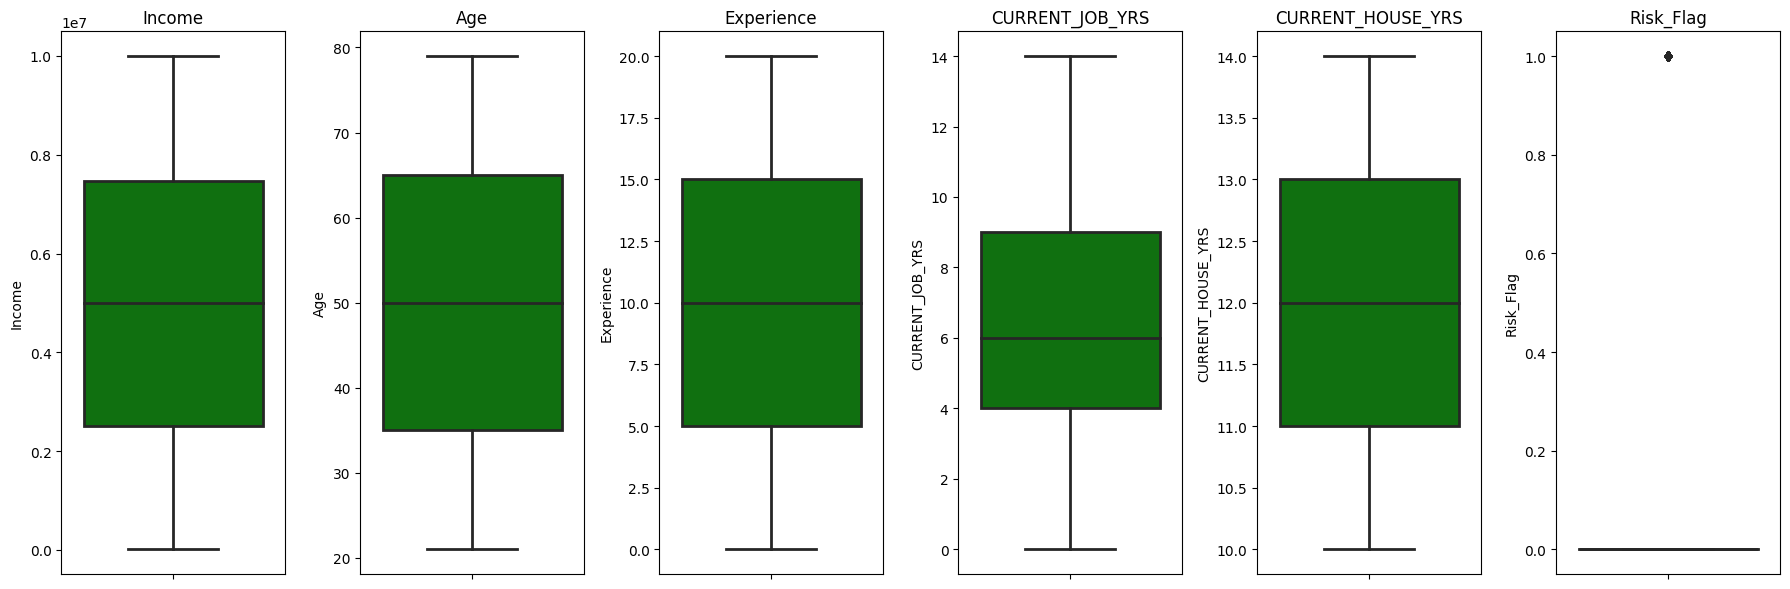

In [ ]:
# Menggunakan len(numerical) untuk mendapatkan jumlah fitur numerik
plt.figure(figsize=(18, 6))
# Loop melalui fitur numerik dan membuat subplot untuk setiap fitur
for i in range(len(numericals)):
    plt.subplot(1, len(numericals), i + 1)
    sns.boxplot(y=data[numericals[i]], color='green', orient='y', linewidth=2)
    plt.title(numericals[i])
    plt.tight_layout()

plt.show()

Boxplot "Income", "CURRENT_HOUSE_YRS", "Experience" menunjukkan distribusi normal dalam bentuk simetris boxplot dimana;
- Garis median berada di tengah kotak,
- Garis ujung kotak menunjukkan kuartil (Q1, Q3),
- Garis melintang (whiskers) menunjukkan rentang interkuartil (IQR), rentang antara (Q1, Q3),
- Tidak ada titik outlier dalam data ini.
Boxplot ini memberikan informasi jelas tentang sebaran "Income", "CURRENT_HOUSE_YRS", "Experience" yang berpusat di sekitar nilai median.

CURRENT_JOB_YRS menunjukkan distribusi data yang cenderung menumpuk dibagian paling rendah/bawah.

In [ ]:
numerical = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"] # Risk_flag tidak dimasukkan
# Fungsi untuk mendeteksi outlier menggunakan rumus IQR
def deteksi_outlier(dataloan, kolom):
    Q1 = dataloan[kolom].quantile(0.25)
    Q3 = dataloan[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outliers = dataloan[(dataloan[kolom] < batas_bawah) | (dataloan[kolom] > batas_atas)]
    return outliers

# Mendeteksi outlier untuk setiap kolom numerik
for kolom in numerical:
    outliers = deteksi_outlier(data, kolom)
    print(f"Outlier dalam kolom '{kolom}':")
    print(outliers)

Outlier dalam kolom 'Income':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []
Outlier dalam kolom 'Age':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []
Outlier dalam kolom 'Experience':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []
Outlier dalam kolom 'CURRENT_JOB_YRS':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []
Outlier dalam kolom 'CURRENT_HOUSE_YRS':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, C

Setelah dideteksi, dapat dilihat dengan rumus IQR bahwa data numerik yaitu Income, Age, Experience, CURRENT_JOB_YRS, dan CURRENT_HOUSE_YRS tidak memiliki outlier.

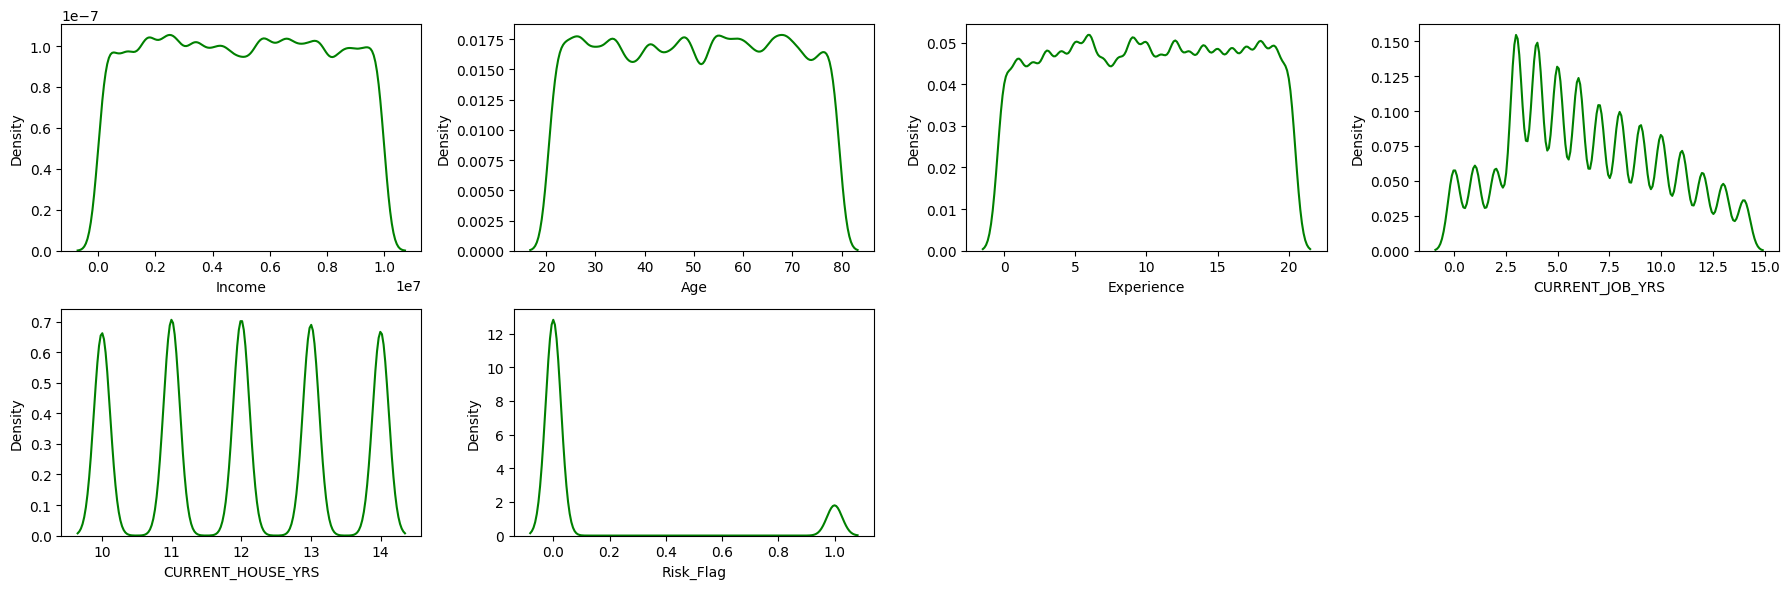

In [ ]:
# Menggunakan len(numerical) untuk mendapatkan jumlah fitur numerik
plt.figure(figsize=(18, 6))
features = numericals
# Loop melalui fitur numerik dan membuat subplot untuk setiap fitur
for i in range(len(numericals)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=data[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()
plt.show()

1. Untuk plot Income, Age, dan Experience dapat dilihat bahwa plot berdistribusi normal.
2. Untuk plot CURRENT_JOB_YRS, dapat dilihat bahwa kepadatan puncak terjadi pada sekitar 5 tahun dan kemudian menurun secara bertahap setelah itu. Ini menunjukkan bahwa sebagian besar orang yang bekerja di perusahaan tersebut memiliki pengalaman kerja antara 3 hingga 7 tahun. Setelah itu, jumlah orang yang bekerja di perusahaan tersebut menurun secara bertahap. Pola distribusi ini bisa dikatakan *Positively Skewed*
3. Untuk plot CURRENT_HOUSE_YRS, dapat dilihat bahwa data menunjukkan stabilitas atau kestabilan dalam jangka waktu tertentu. Dalam grafik tersebut, memiliki pola steady state atau dapat diindikasi bahwa tidak ada perubahan signifikan atau tren yang terlihat dalam data tersebut. Secara sederhana memiliki tren naik turun secara musim.
4. Untuk plot Risk_flag berdasarkan persebaran distribusi, terlihat bahwa mayoritas pelanggan tidak berisiko gagal bayar yaitu saat Risk_FLag = 0, sedangkan pelanggan yang berisiko atau Risk_Flag = 1 berjumlah sedikit namun signifikan dalam dataset.
5. Untuk plot "CURRENT_JOB_YRS" "CURRENT_HOUSE_YRS" dan "Risk_Flag" dapat dilihat berdistribusi Bimodal.

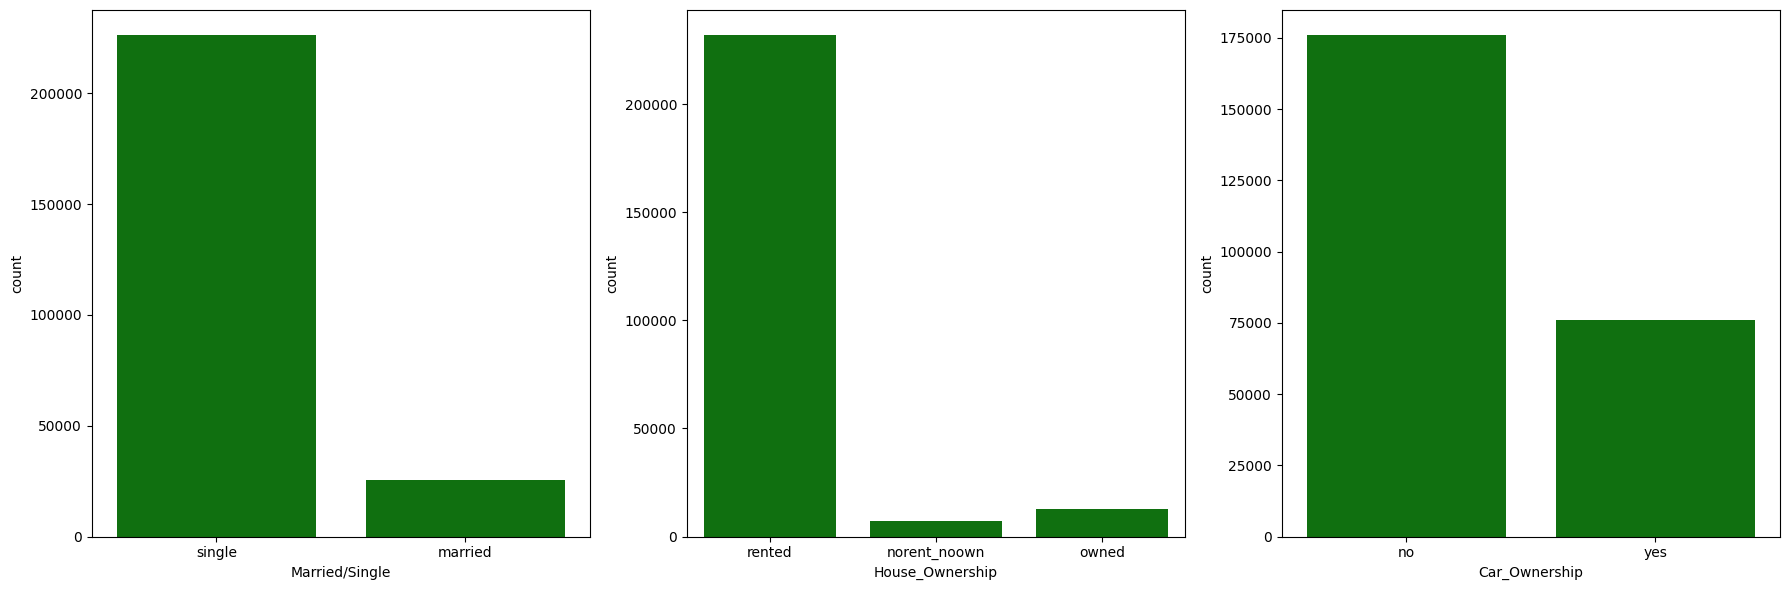

In [ ]:
# Menggunakan len(categoricals) untuk mendapatkan jumlah fitur kategorikal
plt.figure(figsize=(18, 6))
categorical = ["Married/Single", "House_Ownership", "Car_Ownership"]
features=categorical
# Loop melalui fitur kategorikal dan membuat subplot untuk setiap fitur
for i in range(len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=data[features[i]], color='green')
    plt.tight_layout()
plt.show()

1. Terdapat ketimpangan yang besar pada *House Ownership* antara rented, norent_noown dan owned.
2. Terdapat ketimpangan yang besar pada *Marriage/single* antara dimana mayoritas pelanggan merupakan single
3. Countplot *Car_wonership* yaitu, jumlah individu yang tidak menggunakan mobil lebih banyak dari pada individu yang menggunakan mobil.
Ini menunjukkan dalam analisis risiko kredit, kepemilikan mobil dapat menjadi faktor yang memengaruhi kemampuan seseorang untuk membayar pinjaman.

### Tugas No 3 Multivariate Analysis



<ipython-input-6-b88489819318>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=True)


<Axes: >

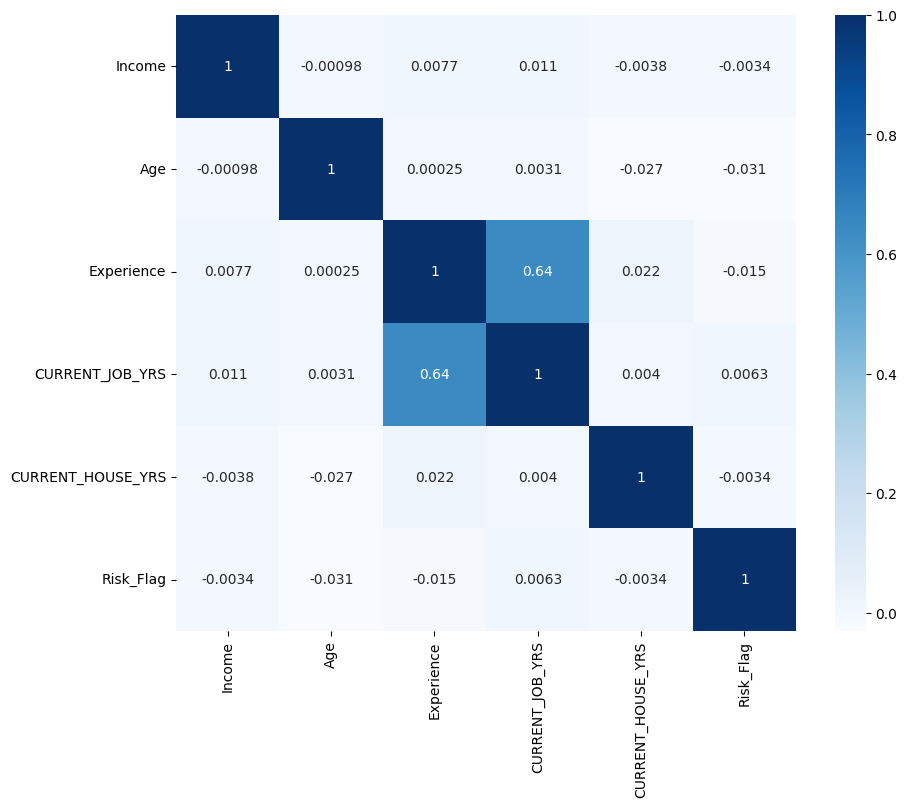

In [ ]:
# Mengecek korelasi feature dengan label menggunakan Correlation Heatmap (Numeric)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

Korelasi masing-masing feature dan label disajikan sebagai berikut.
1. Feature "Income" berkorelasi negatif dengan "Risk_Flag" di angka -0.0034.
2. Feature "Age" berkorelasi negatif dengan "Risk_Flag" di angka -0.031.
3. Feature "Experience" berkorelasi negatif dengan "Risk_Flag" di angka -0.015.
4. Feature "CURRENT_JOB_YRS" berkorelasi positif dengan "Risk_Flag" di angka 0.0063.
5. Feature "CURRENT_HOUSE_YRS" berkorelasi negatif dengan "Risk_Flag" di angka -0.0034.

Karena korelasi tidak selalu menunjukkan hubungan kausalitas antara fitur dan label, maka berdasarkan angka korelasi terkuat, feature "Age" dan "Experience" adalah feature yang paling relevan dan dipertahankan.

<Figure size 1800x600 with 0 Axes>

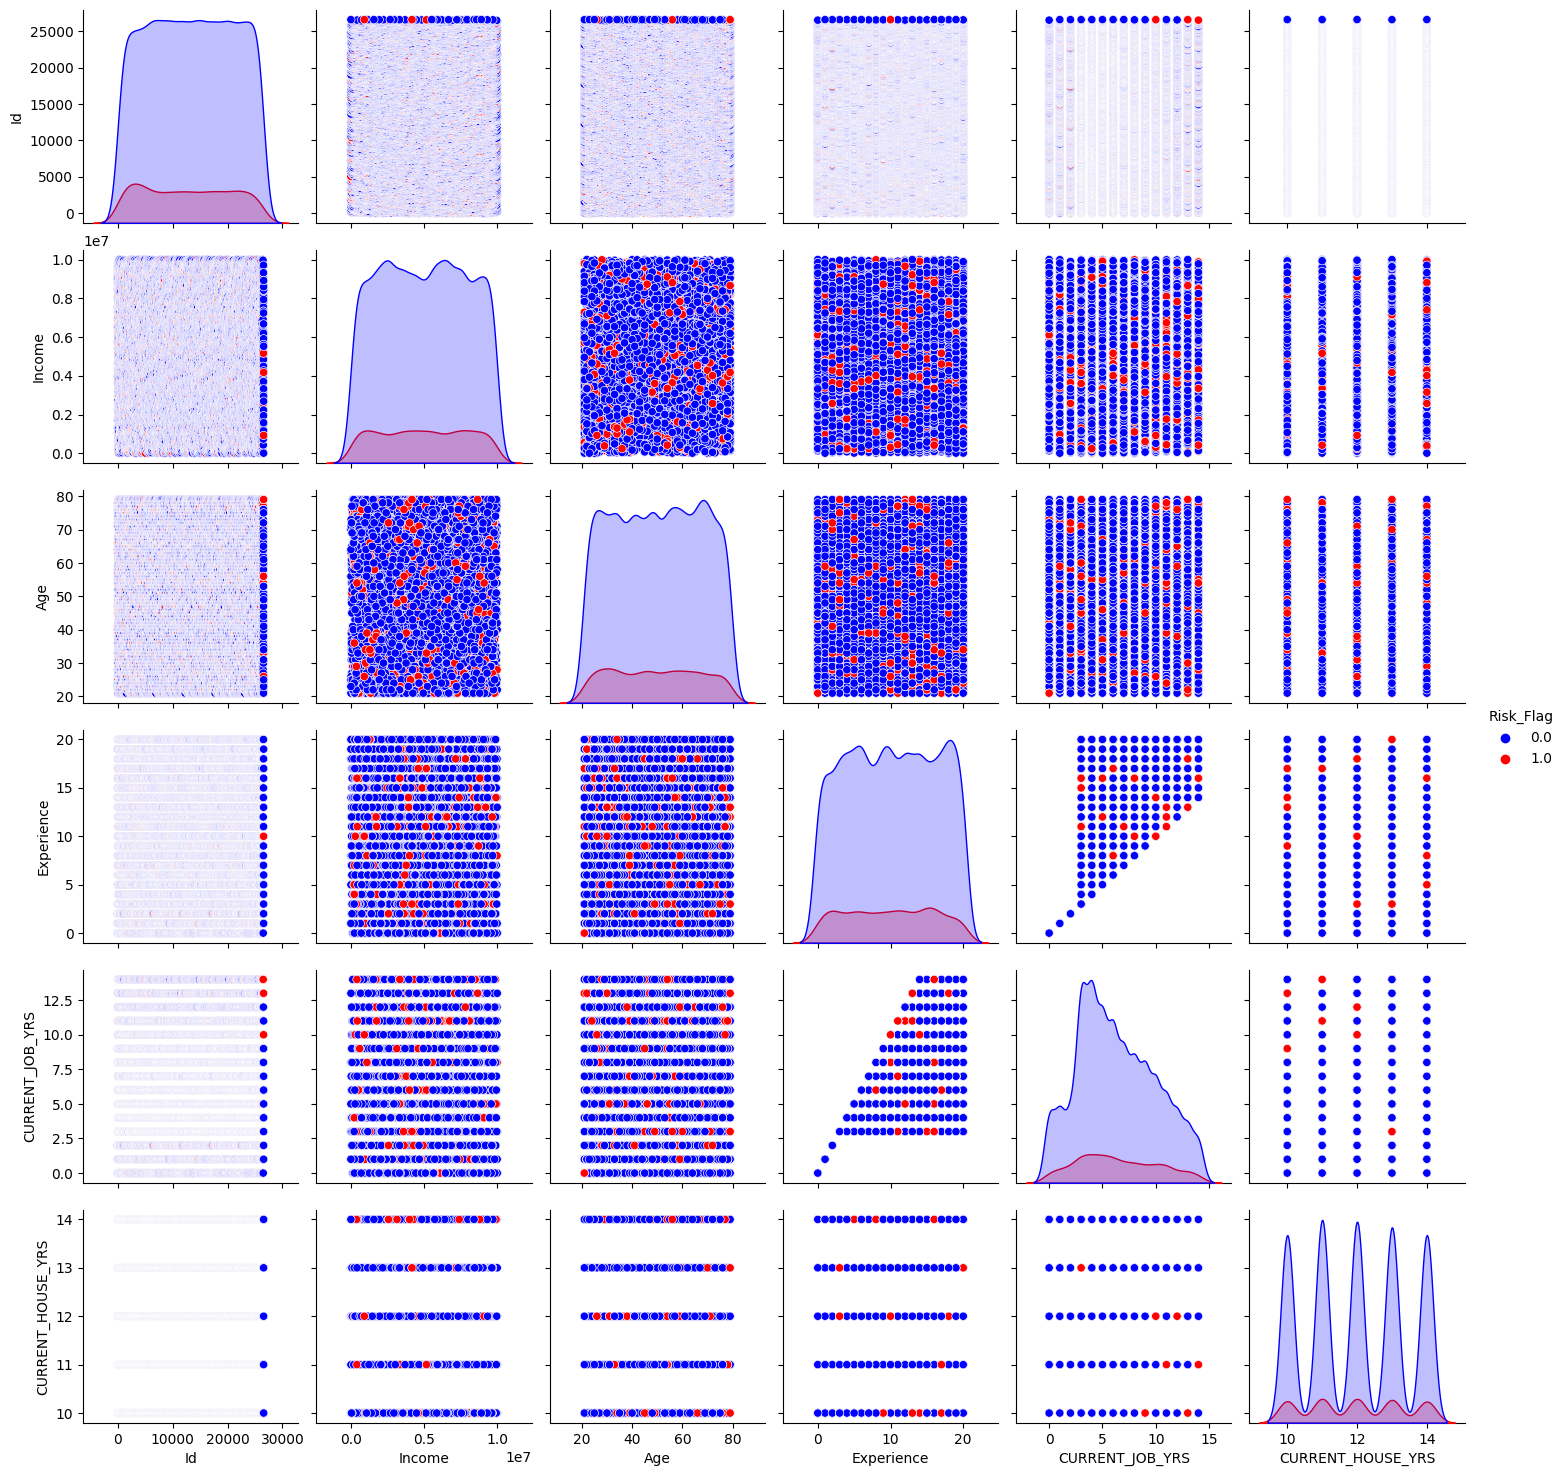

In [ ]:
# Menggunakan Pair Plots (Numeric)
plt.figure(figsize=(18, 6))
sns.pairplot(data, diag_kind='kde', hue='Risk_Flag', palette=['Blue', 'Red'])

Pada grafik Pair Plots (Numeric) di atas, dapat dilihat bahwa korelasi antar-feature Numeric tidak menunjukkan pola yang menarik, sehingga diperlukan segmentasi yang lebih baik.

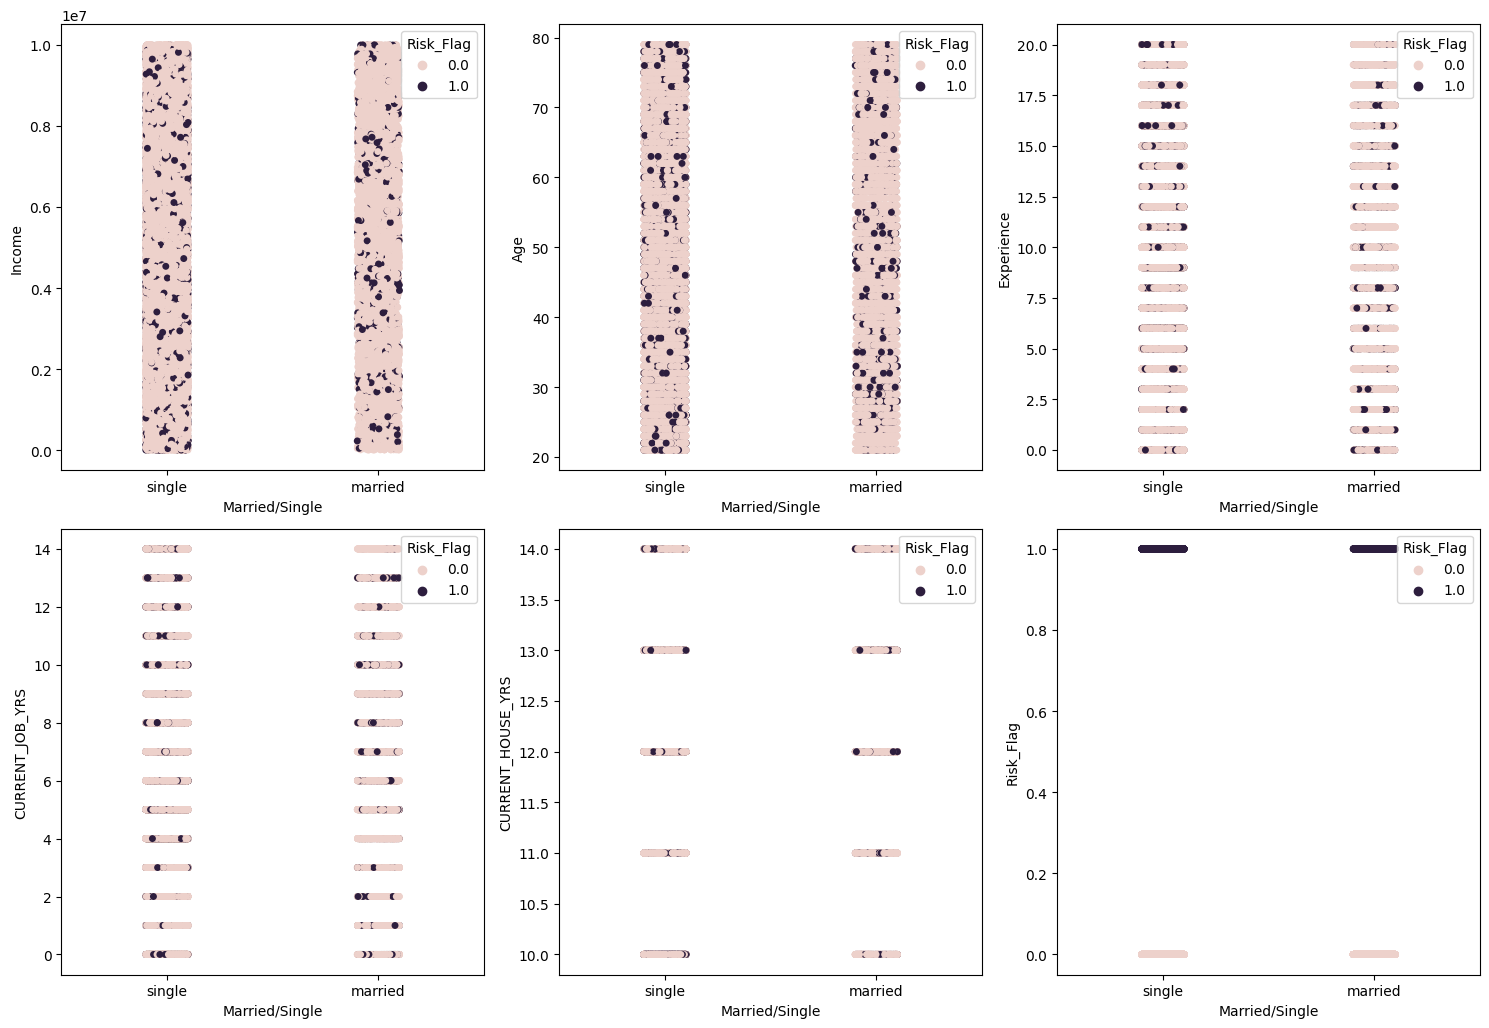

In [ ]:
# Married/Single
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=data, x='Married/Single', y=numerical[i], hue='Risk_Flag')
    plt.tight_layout()

Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "Married/Single" dengan feature Numeric tidak menunjukkan pola yang menarik.

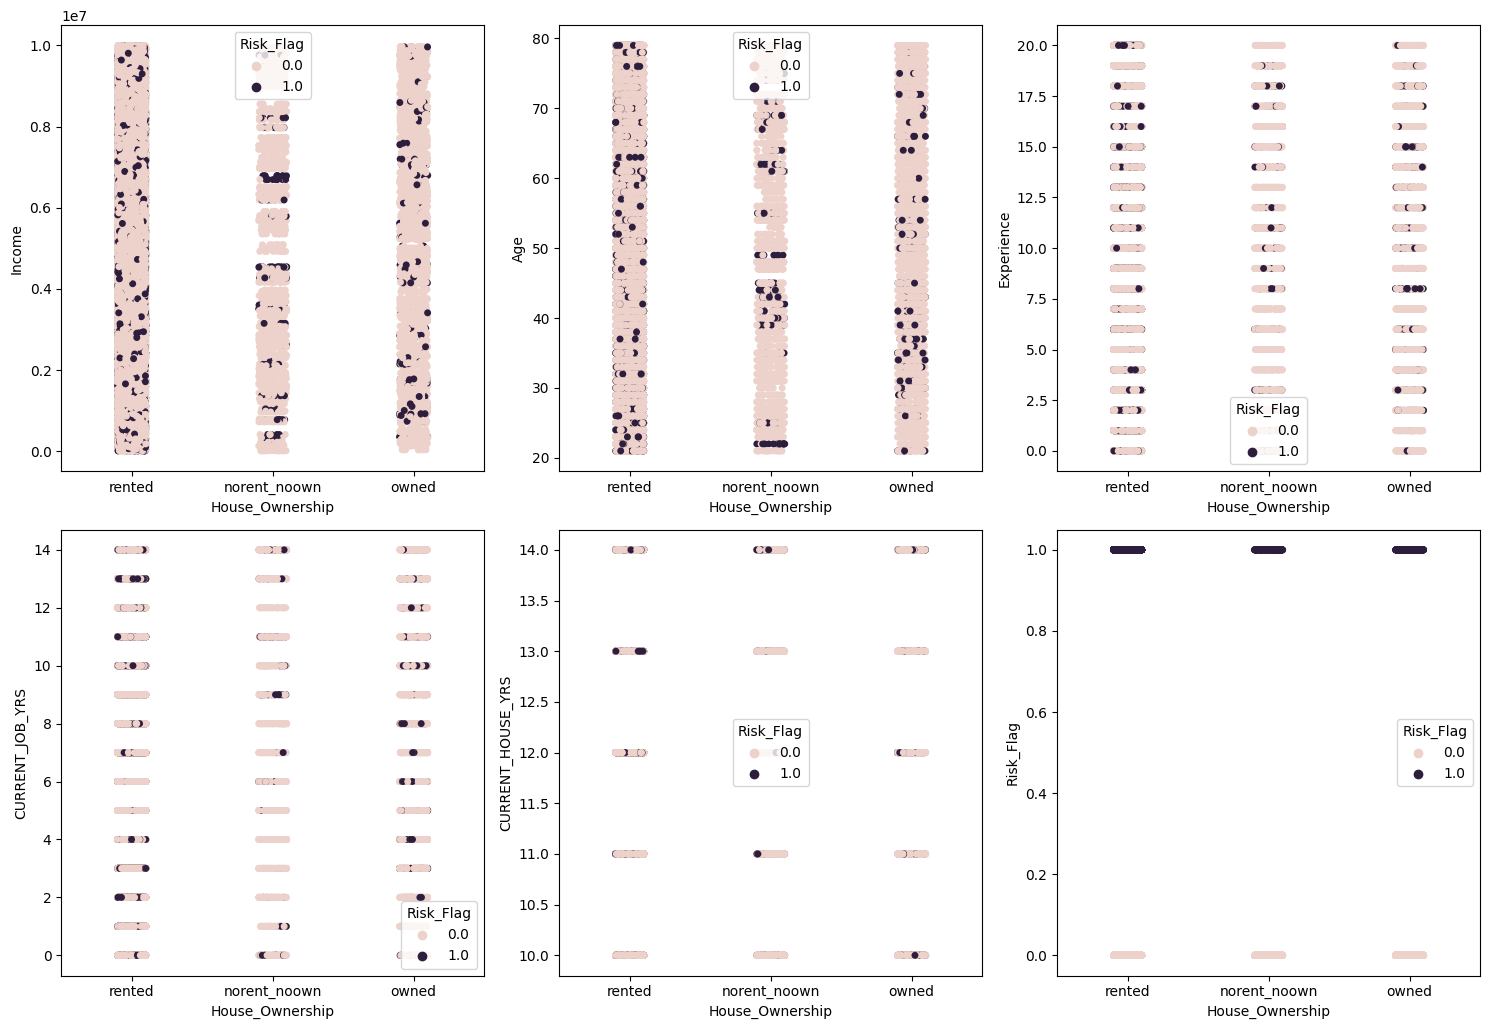

In [ ]:
# House_Ownership
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=data, x='House_Ownership', y=numerical[i], hue='Risk_Flag')
    plt.tight_layout()

Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "House_Ownership" dengan feature Numeric tidak menunjukkan pola yang menarik.

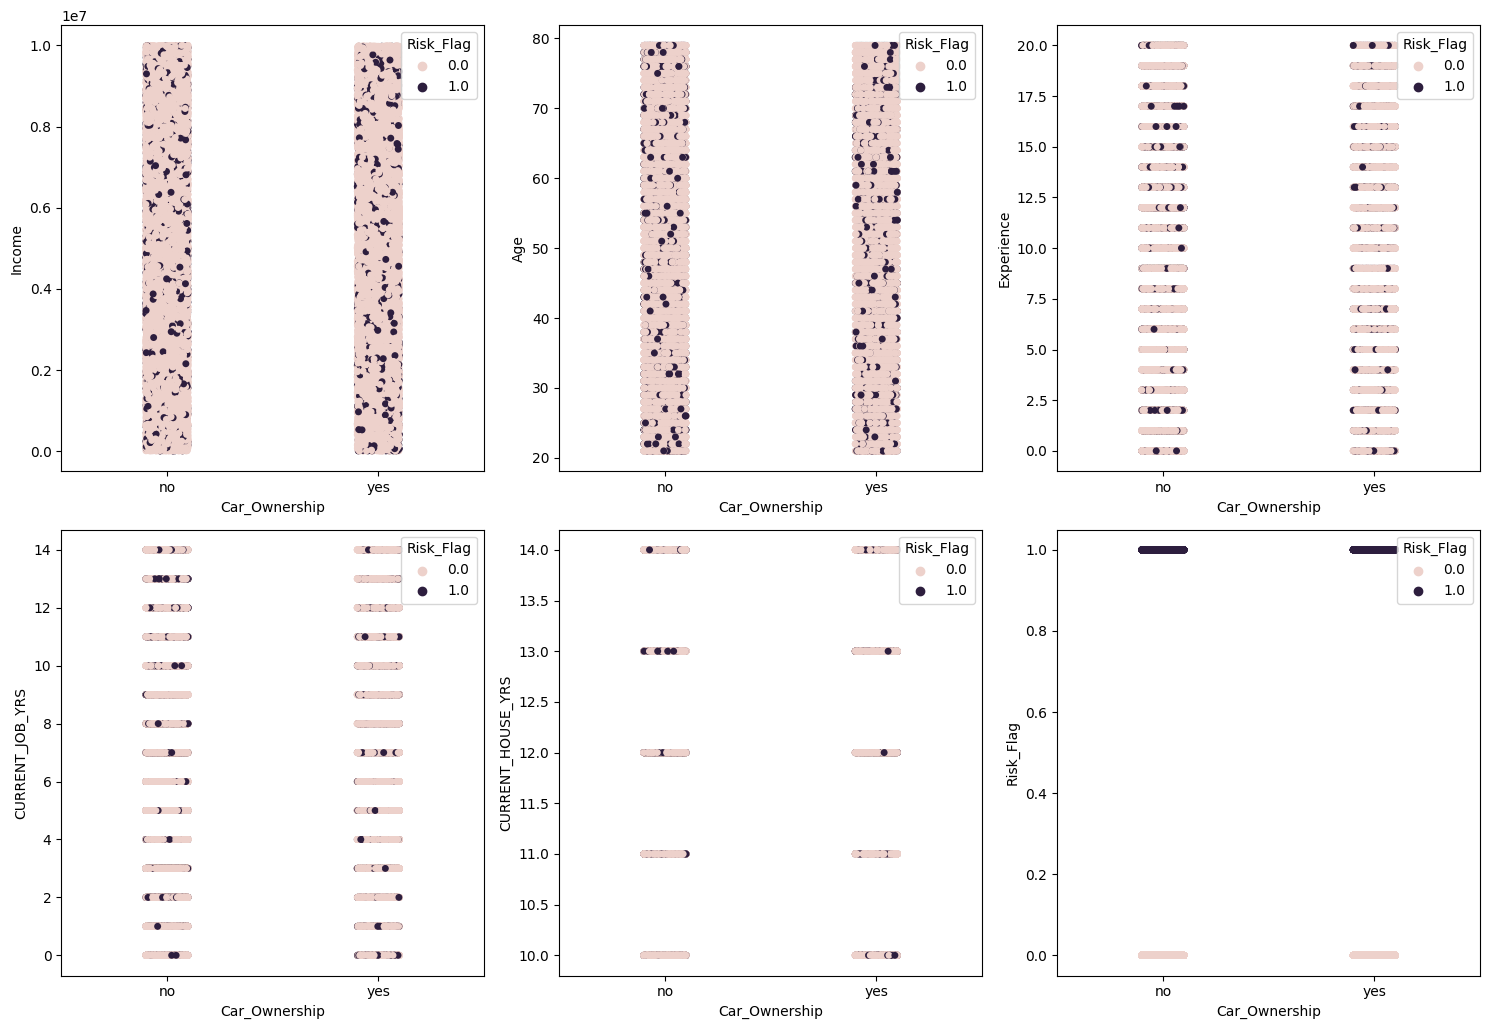

In [ ]:
# Car_Ownership
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=data, x='Car_Ownership', y=numerical[i], hue='Risk_Flag')
    plt.tight_layout()

Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "Car_Ownership" dengan feature Numeric tidak menunjukkan pola yang menarik.

Untuk Category "Profession", "CITY", dan "STATE" tidak dilakukan pengecekan karena segmentasinya terlalu banyak.

### Tugas No 4 Business Insight

#### Insight 1 : Risk Rate Analysis Based on Current House

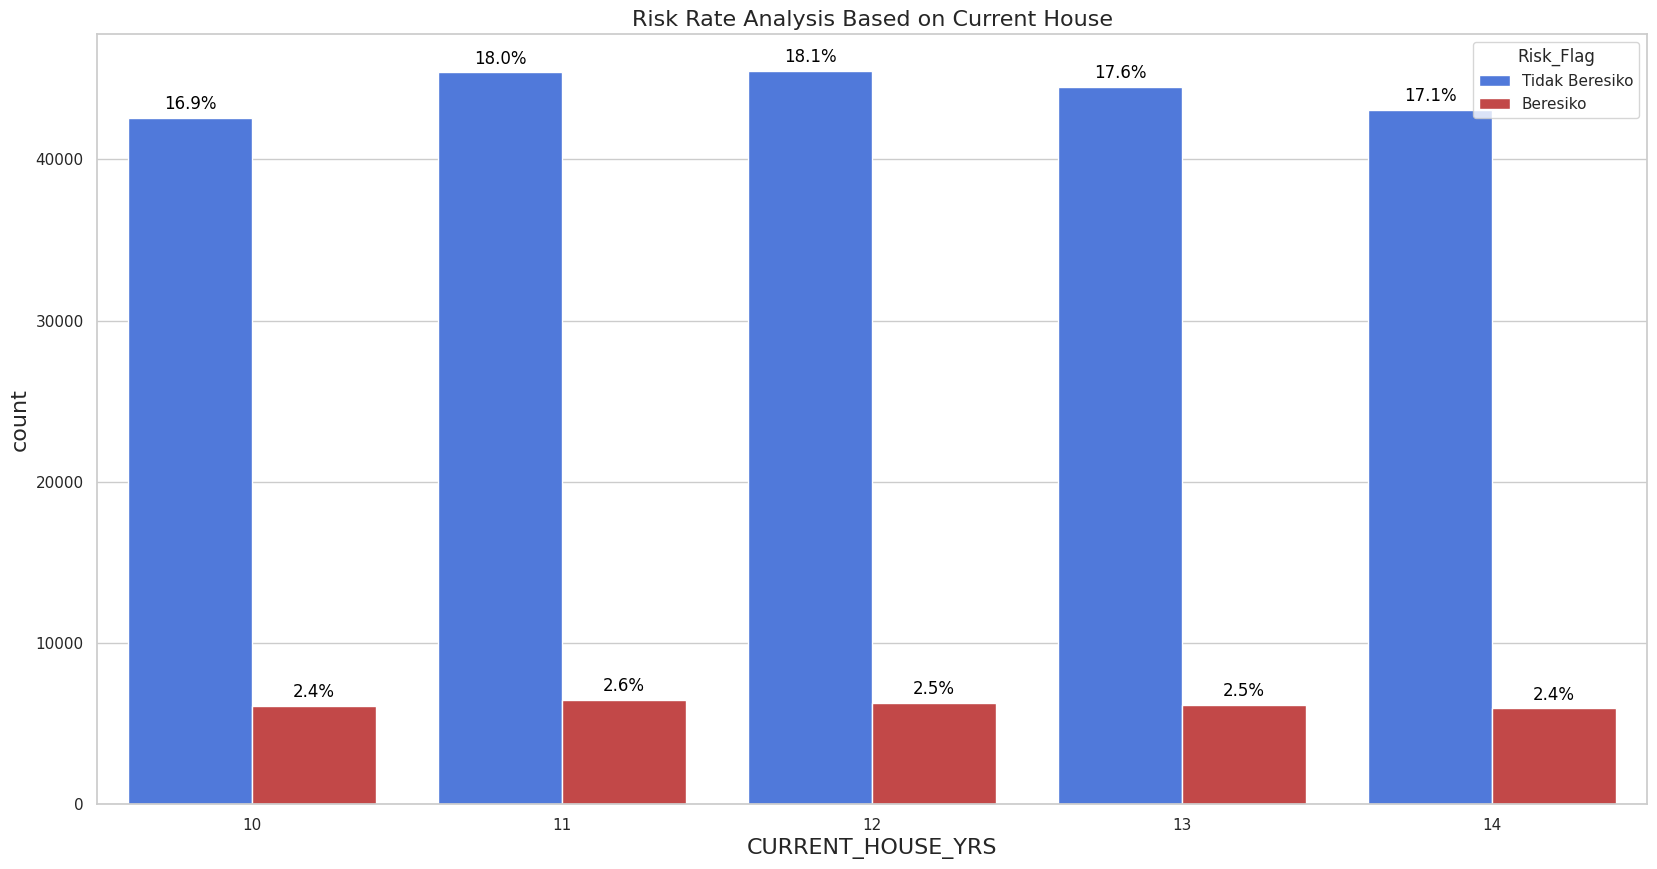

In [ ]:
# Melakukan visulisasi countplot
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x='CURRENT_HOUSE_YRS',
                   data=data,
                   hue='Risk_Flag',
                   palette=['#3970F1', '#D63434']
                  )

plt.title('Risk Rate Analysis Based on Current House', fontsize=16)
plt.xlabel('CURRENT_HOUSE_YRS',fontsize=16)
plt.ylabel("count",fontsize=16)

legend_labels = ['Tidak Beresiko', 'Beresiko']
plt.legend(legend_labels, title="Risk_Flag")

# Menghitung dan menampilkan persentase dari setiap kelompok di visualisasi
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                fontsize=12,
                color='black',
                xytext=(0, 10),
                textcoords='offset points'
               )

plt.show()

**Insight :**  

**Rekomendasi :**  

#### Insight 2 : Risk Rate Analysis Based on House Ownership

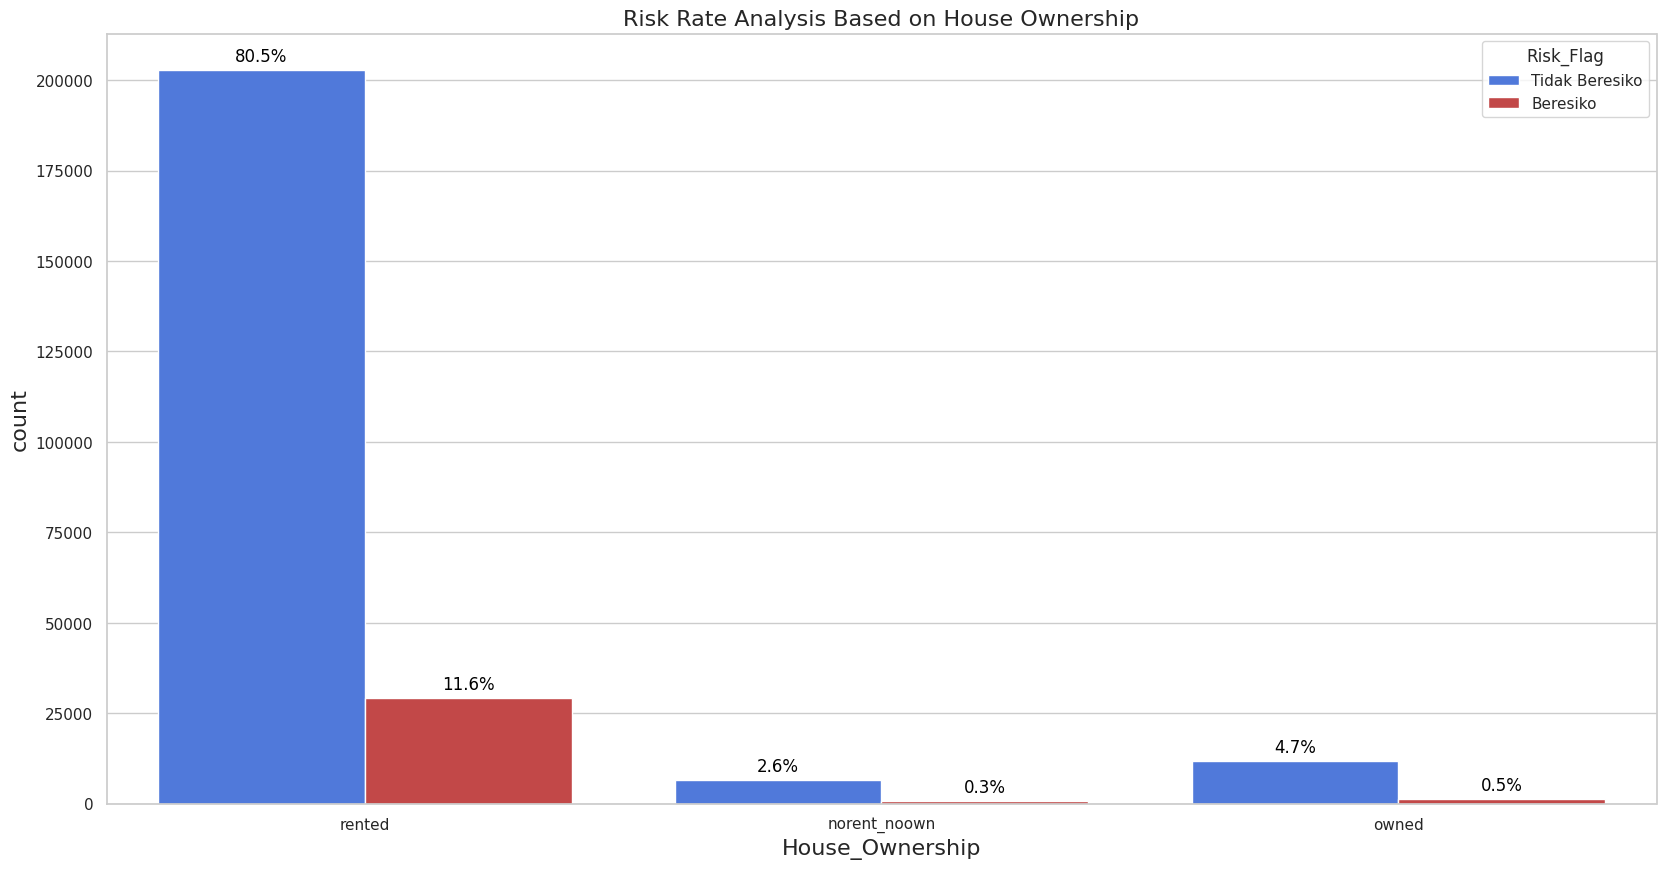

In [ ]:
# Melakukan visulisasi countplot
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x='House_Ownership',
                   data=data,
                   hue='Risk_Flag',
                   palette=['#3970F1', '#D63434']
                  )

plt.title('Risk Rate Analysis Based on House Ownership', fontsize=16)
plt.xlabel('House_Ownership',fontsize=16)
plt.ylabel("count",fontsize=16)

legend_labels = ['Tidak Beresiko', 'Beresiko']
plt.legend(legend_labels, title="Risk_Flag")

# Menghitung dan menampilkan persentase dari setiap kelompok di visualisasi
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                fontsize=12,
                color='black',
                xytext=(0, 10),
                textcoords='offset points'
               )

plt.show()

**Insight :**  
Disimpulkan bahwa risiko gagal bayar pinjaman lebih tinggi pada pelanggan yang memiliki jenis rumah rented (11,6%) dibandingan dengan pelanggan yang memiliki jenis rumah lainnya. Hal ini dapat disebabkan oleh beberapa faktor seperti pendapatan, dan kepemilikan aset.

-


**Rekomendasi :**  

#### Insight 3 : Risk Rate Analysis Based on Married/Single

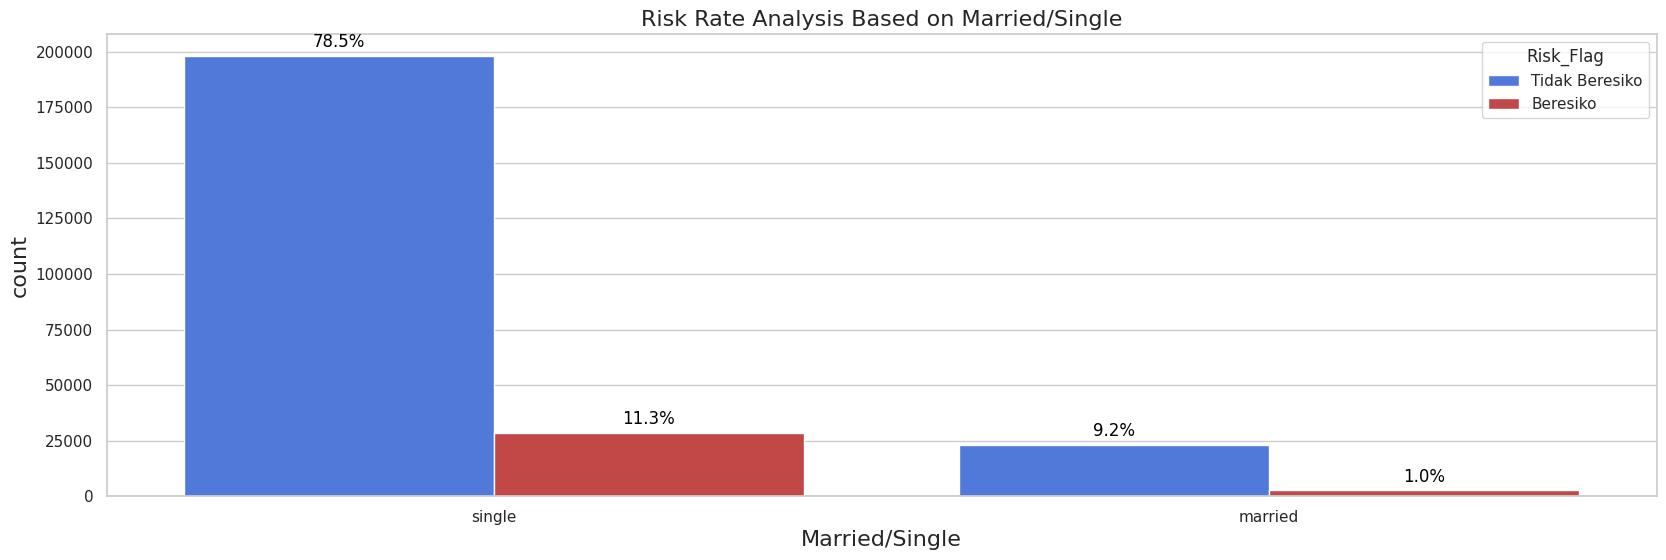

In [ ]:
# Melakukan visulisasi countplot
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
ax = sns.countplot(x='Married/Single',
                   data=data,
                   hue='Risk_Flag',
                   palette=['#3970F1', '#D63434']
                  )

plt.title('Risk Rate Analysis Based on Married/Single', fontsize=16)
plt.xlabel('Married/Single',fontsize=16)
plt.ylabel("count",fontsize=16)

legend_labels = ['Tidak Beresiko', 'Beresiko']
plt.legend(legend_labels, title="Risk_Flag")

# Menghitung dan menampilkan persentase dari setiap kelompok di visualisasi
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                fontsize=12,
                color='black',
                xytext=(0, 10),
                textcoords='offset points'
               )

plt.show()

**Insight :**  
Disimpulkan bahwa risiko gagal bayar pinjaman lebih tinggi pada pelanggan yang memiliki status single (11,3%) dibandingkan dengan pelanggan yang memiliki status merried (9,2%). Hal ini dapat disebabkan oleh beberapa faktor seperti pendapatan, kepemilikan aset, dan tanggungan biaya hidup.

-

**Rekomendasi :**  
Perusahaan dapat melakukan penilaian terhadap pelanggan yang belum menikah dengan mempertimbangkan faktor seperti pendapatan, kepemilikan aset, dan tanggungan biaya hidup.

### Tugas 5 Git


Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada perubahan version dari waktu ke waktu.

A. Buat Repository Git

Link Repository : https://github.com/HafiizhTH/FinalProject_Kelompok1A.git

B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut
Untuk file README, dapat merupakan summary insight yang telah didapatkan dari EDA.